## PART 1 - Key Facial Points Detection
Creating a deep learning model based on Convolutional Neural Networks and Residual Blocks to predict facial key-points.

In [1]:
#Something in this breaks model layer visual -- to fix

# # Importing libraries
# import pandas as pd
# import numpy as np
# import os
# import PIL
# import seaborn as sns
# import pickle
# from PIL import *
# import cv2
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.applications import DenseNet121
# from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.initializers import glorot_uniform
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
# from IPython.display import display
# from tensorflow.python.keras import *
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import layers, optimizers
# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.layers import *
# from tensorflow.keras import backend as K
# from keras import optimizers
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split


In [2]:
#Cell doesn't break model layer visual -- to investigate

import pandas as pd
import numpy as np
import os
import seaborn as sns
import pickle
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
# load in key facial data points
keyfacial_df = pd.read_csv("data.csv")
keyfacial_df.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...


***

<br>

### Exploratory Analysis and Data Cleaning


In [4]:
# Obtain relevant information about dataframe
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [5]:
# Checking for null values
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [6]:
# Size of datafram
keyfacial_df['Image'].shape

(2140,)

In [7]:
# Reshaping data --> since values for the image are given as space seperated string, the values need to be reseparated using a space: ' '.
# The data is then converted into a 1d numpy array which then is reshaped into a 2d array with a size of 96 by 96 pixels (the dimensions of the image)
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96,96))


In [8]:
# Confirming the dimensions
keyfacial_df['Image'][0].shape

(96, 96)

In [9]:
# Looking at the statistical summary of the dataframe
keyfacial_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


***

<br>

### Preforming Image Visualization

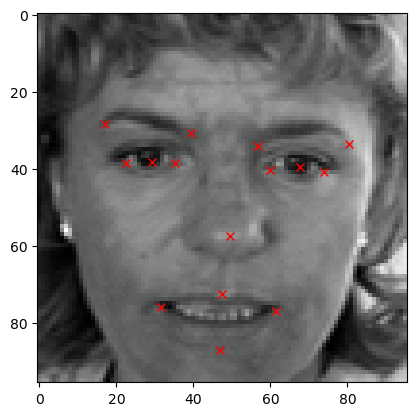

In [10]:
# Plotting a random image from the dataset along its corresponding facial keypoints

# Selecting a random row
i = np.random.randint(1, len(keyfacial_df))
# Plotting row i's associated image
plt.imshow(keyfacial_df['Image'][i], cmap = 'gray')
# Looping through i by steps of 2 to map the x and y coordinates of each facial keypoint
for j in range(1, 31, 2):
    plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')

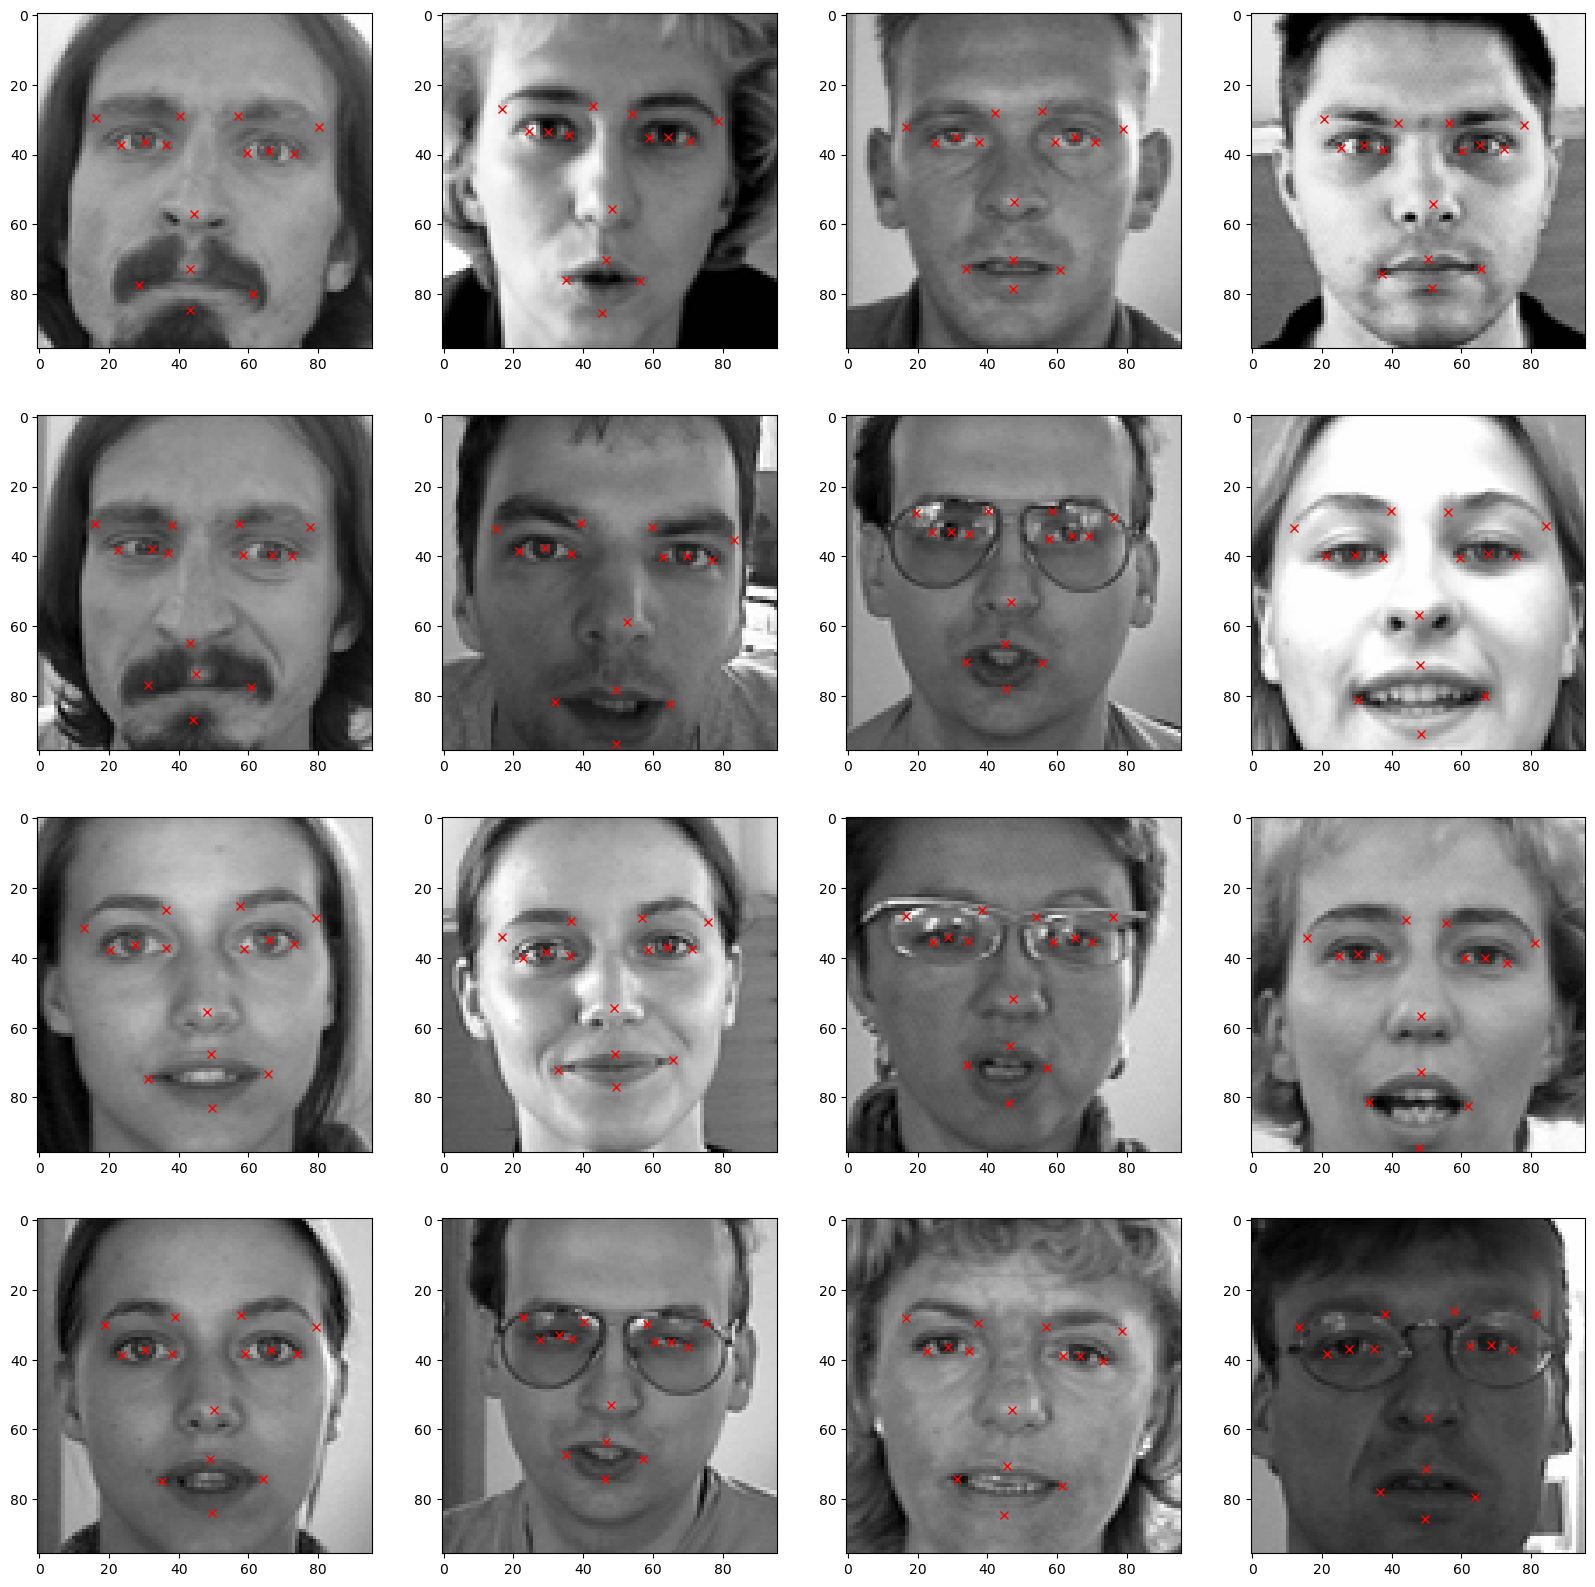

In [11]:
# Plotting more images in a 4x4 grid

fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    image = plt.imshow(keyfacial_df['Image'][i], cmap = 'gray')
    for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')

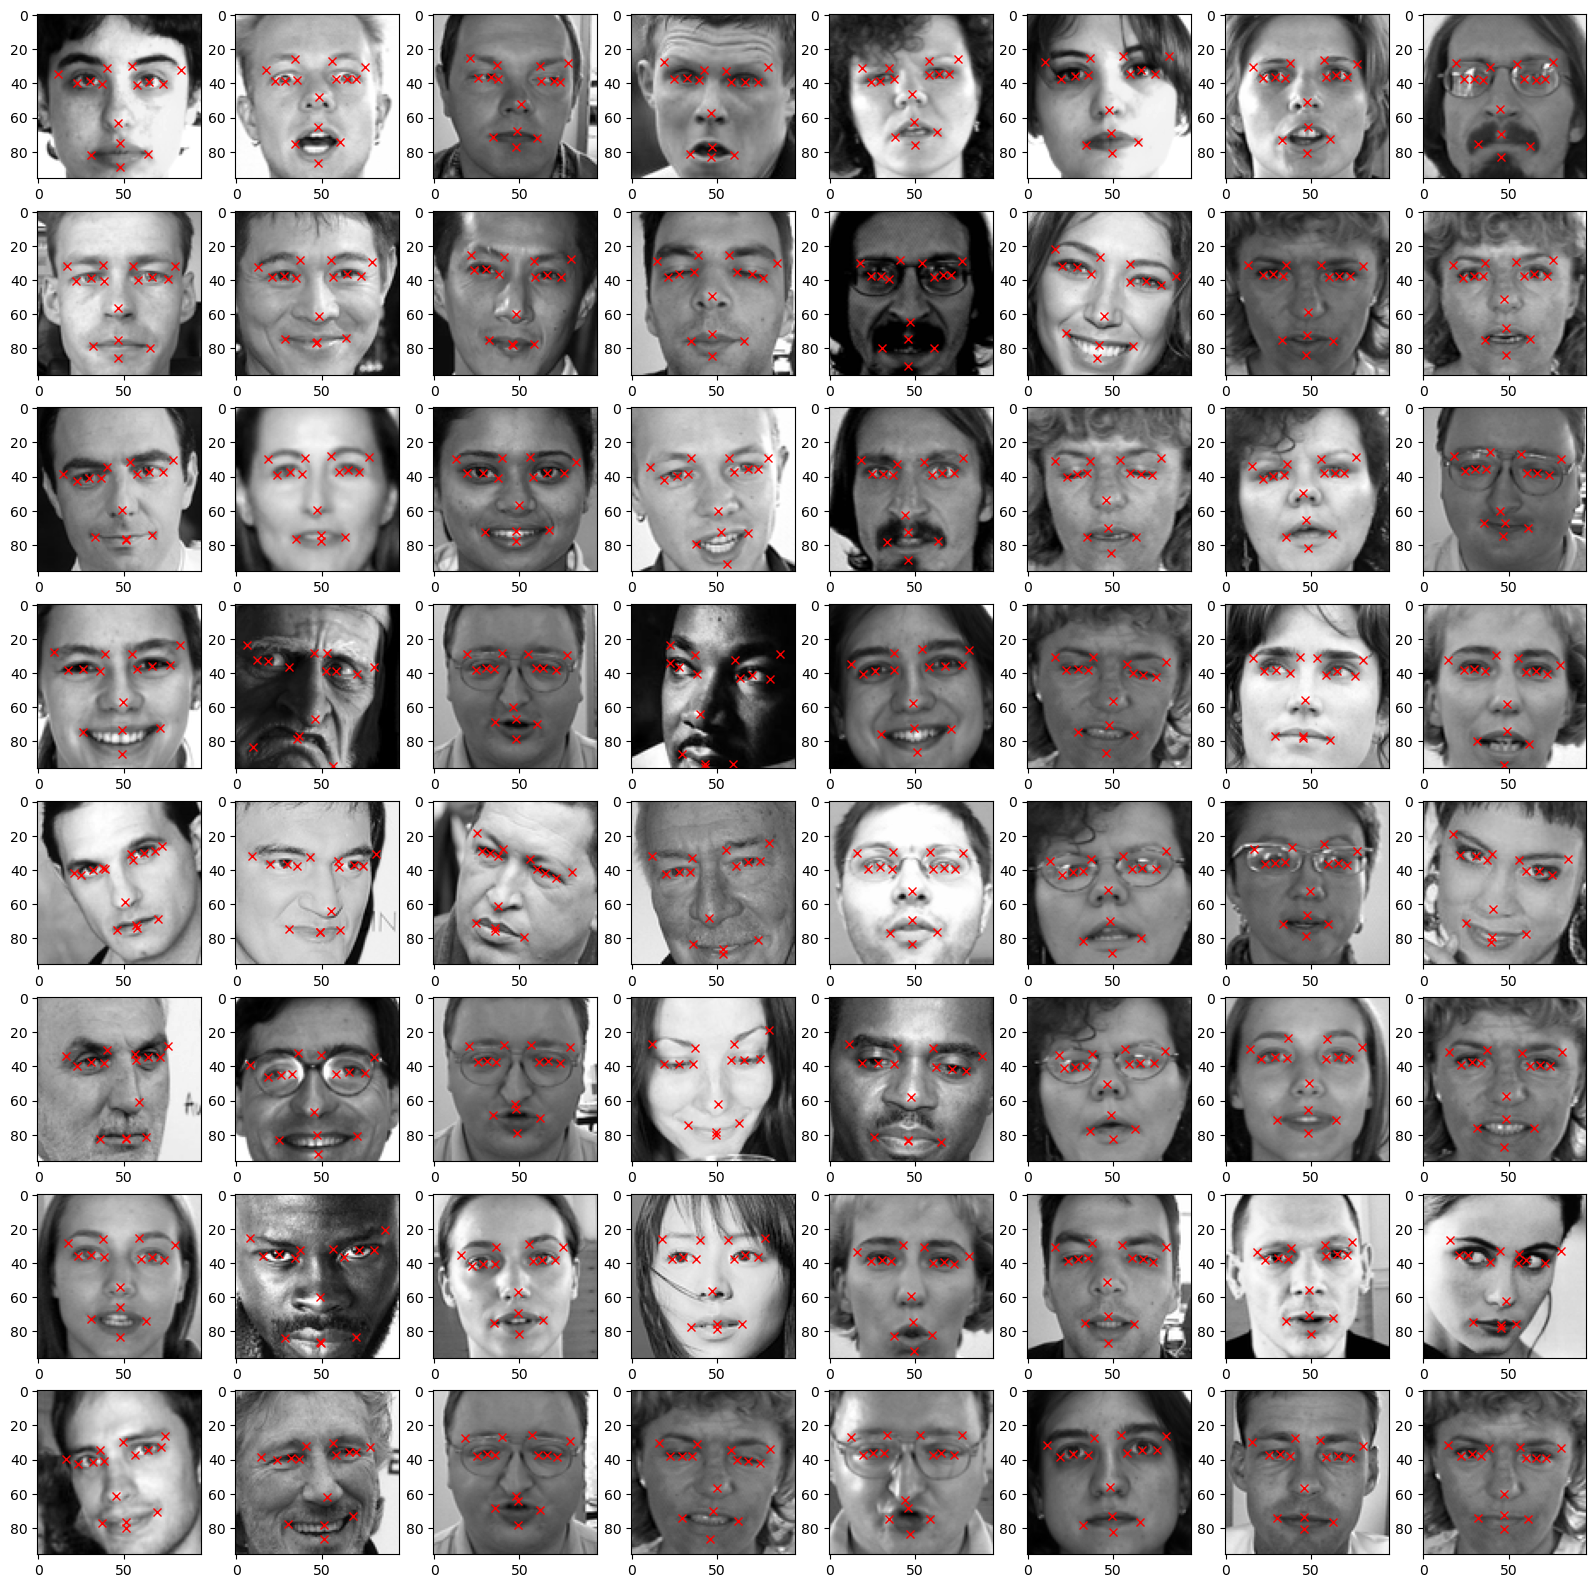

In [12]:
# Sanity check on the data

fig = plt.figure(figsize=(20, 20))

for j in range(64):
    i = np.random.randint(1, len(keyfacial_df))
    ax = fig.add_subplot(8, 8, j + 1)
    image = plt.imshow(keyfacial_df['Image'][i], cmap = 'gray')
    for k in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[i][k-1], keyfacial_df.loc[i][k], 'rx')

***

<br>

### Preform Image Augmentation

In [13]:
# Creating a copy of the dataframe 
import copy
keyfacial_df_copy = copy.copy(keyfacial_df)

# The copy will include a varied version of the original's images to improve the model's generalibility

In [14]:
# Obtaining the columns in the dataframe besides the image portion
columns = keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [15]:
# Horizontally flipping the images (mirroring)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis=1))

# Adjusting the x coordinates to the mirrored images (y coordinates stay the same)
for i in range(len(columns)):
    if i%2 == 0:
        keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x)) 
        # Flipping the coordinate is achieved by subtracting the original number by the width of the image i.e. 96 pixels.

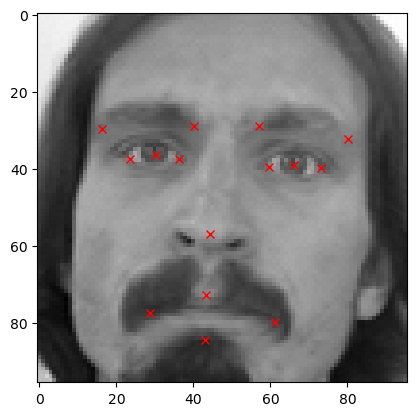

In [16]:
# Original image
plt.imshow(keyfacial_df['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
    plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')

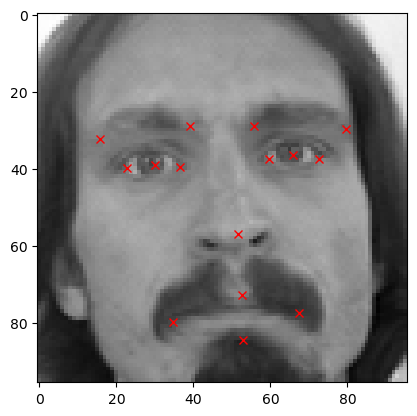

In [17]:
# Flipping image
plt.imshow(keyfacial_df_copy['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
    plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [18]:
# Concatenate the original dataframe with the flipped dataframe
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))
augmented_df.shape

(4280, 31)

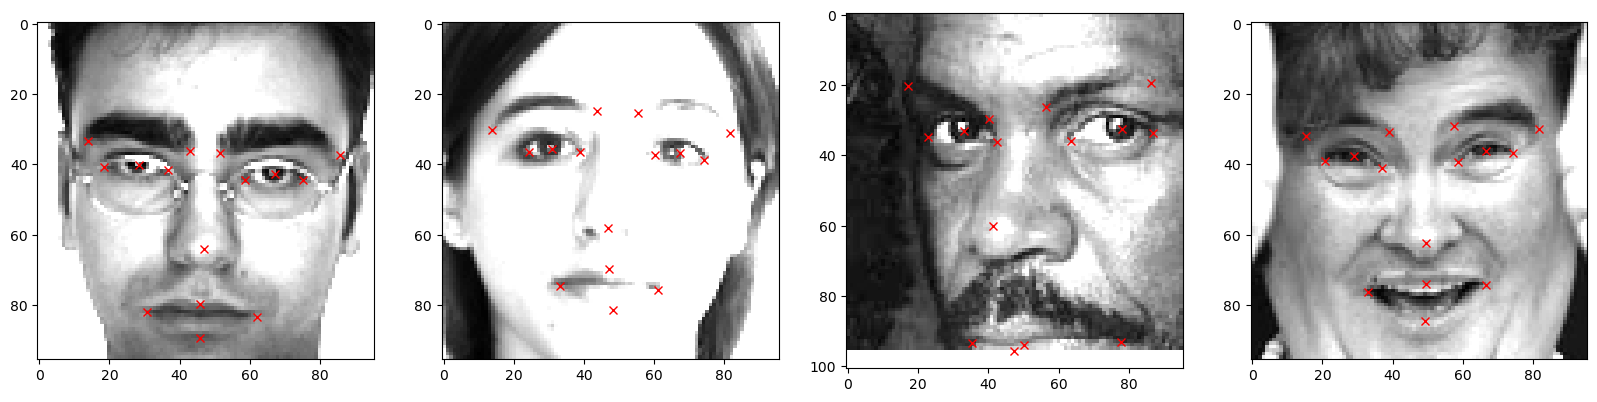

In [19]:
# Increasing the brightness of random images 
#This is achieved by multiplying pixel values between 1.5 and 2, and clipping the value between 0 and 255

keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.clip(np.random.uniform(1.5, 2) * x, 0.0, 255.0))

# Confirming changes
fig = plt.figure(figsize=(20, 20))
for i in range(4):
    j = np.random.randint(1, len(keyfacial_df))
    ax = fig.add_subplot(1, 4, i + 1)
    image = plt.imshow(keyfacial_df_copy['Image'][j], cmap = 'gray')
    for k in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[j][k-1], keyfacial_df_copy.loc[j][k], 'rx')


In [20]:
# Adding the new images
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

(6420, 31)

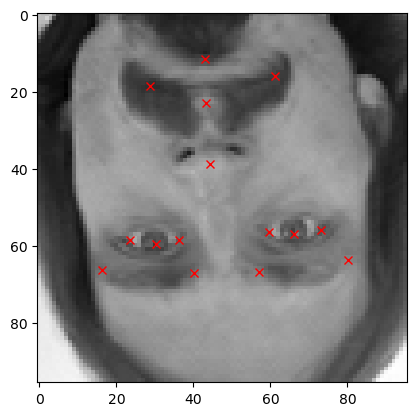

In [21]:
# Vertically flipping the images 
keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis=0))

# Adjusting the y coordinates to the flipped images (x coordinates stay the same)
for i in range(len(columns)):
    if i%2 == 1:
        keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x)) 
        # Flipping the coordinate is achieved by subtracting the original number by the heighth of the image i.e. 96 pixels.

plt.imshow(keyfacial_df_copy['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
    plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [22]:
# Adding changes
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

(8560, 31)

***

<br>

### Preform Data Normalization and Training Data Preparation

In [23]:
# Input

# Storing all images from augmented_df into a list called img
img = augmented_df[:, 30]

# Normalizing the images
img = img/255. #dividing by 255 scales down the pixel values to a range between 0 and 1

# Creating an empy array of shape (x, 96, 96, 1) to feed the model
X = np.empty((len(img), 96, 96, 1))

# Converting the img list dimensions to match those of array X and adding the values
for i in range(len(img)):
    X[i,] = np.expand_dims(img[i], axis = 2)

# Converting type to float32
X = np.asarray(X).astype(np.float32)
X.shape 

(8560, 96, 96, 1)

In [24]:
# Output

# Obtaining the value of x and y coordinates
y = augmented_df[:, :30]
y = np.asarray(y).astype(np.float32)
y.shape

(8560, 30)

In [25]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

print(X_train.shape)
print(X_test.shape)

(5136, 96, 96, 1)
(3424, 96, 96, 1)


***

<br>

### Build Deep Residual Neural Network Key Facial Points Detection Model

In [26]:
def res_block(X, filter, stage):
    # Convolutional_Block
    X_copy = X
    
    f1, f2, f3 = filter
    
    # Main path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name = 'res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1), name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)
    
    #Short path
    X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1), name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)
    
    #ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    
    #Identity_Block_1
    X_copy = X
    
    #Main path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2, kernel_size = (3,3),strides = (1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, kernel_size = (1,1), strides = (1,1), name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)
    
    #ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    
    #Identity_Block_2
    X_copy = X
    
    #Main path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2, kernel_size = (3,3),strides = (1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, kernel_size = (1,1), strides = (1,1), name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)
    
    #ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    return X

In [27]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name= 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis= 3, name= 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# # 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((2,2), name= 'Average_Pooling')(X)

#Final Layer
X = Flatten()(X)
X = Dense(4096, activation= 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation= 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation= 'relu')(X)


model_1_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 102, 102, 1)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']           

# Compile and Train Key Facial Points Detection Deep Learning Model

In [28]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2= 0.999, amsgrad= False)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer= adam, metrics= ['accuracy'])

In [29]:
# Save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose= 1, save_best_only= True)

In [35]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size= 32, epochs= 100, validation_split= 0.05, callbacks=[checkpointer])

Epoch 1/100
153/153 [==============================] - ETA: 0s - loss: 46.7933 - accuracy: 0.6645
Epoch 1: val_loss improved from 156.77362 to 88.94798, saving model to FacialKeyPoints_weights.hdf5
153/153 [==============================] - 71s 461ms/step - loss: 46.7933 - accuracy: 0.6645 - val_loss: 88.9480 - val_accuracy: 0.7704
Epoch 2/100
153/153 [==============================] - ETA: 0s - loss: 30.7460 - accuracy: 0.6667
Epoch 2: val_loss improved from 88.94798 to 70.12200, saving model to FacialKeyPoints_weights.hdf5
153/153 [==============================] - 70s 459ms/step - loss: 30.7460 - accuracy: 0.6667 - val_loss: 70.1220 - val_accuracy: 0.6420
Epoch 3/100
153/153 [==============================] - ETA: 0s - loss: 26.1822 - accuracy: 0.6825
Epoch 3: val_loss improved from 70.12200 to 64.14948, saving model to FacialKeyPoints_weights.hdf5
153/153 [==============================] - 71s 466ms/step - loss: 26.1822 - accuracy: 0.6825 - val_loss: 64.1495 - val_accuracy: 0.6848


In [36]:
# Save the model architecture to json file for future use

model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json", "w") as json_file:
    json_file.write(model_json)

# Assess Trained Key Facial Points Detection Model Performance

In [38]:
with open('FacialKeyPoints-model.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# Load model architecture
model_1_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
model_1_facialKeyPoints.load_weights('FacialKeyPoints_weights.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate= 0.0001, beta_1= 0.9, beta_2= 0.999, amsgrad= False)
model_1_facialKeyPoints.compile(loss= 'mean_squared_error', optimizer= adam, metrics= ['accuracy'])

In [43]:
# Evaluate the model

result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

107/107 [==============================] - 6s 54ms/step - loss: 42.1625 - accuracy: 0.8081
Accuracy : 0.8081191778182983


In [40]:
# Get model keys

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

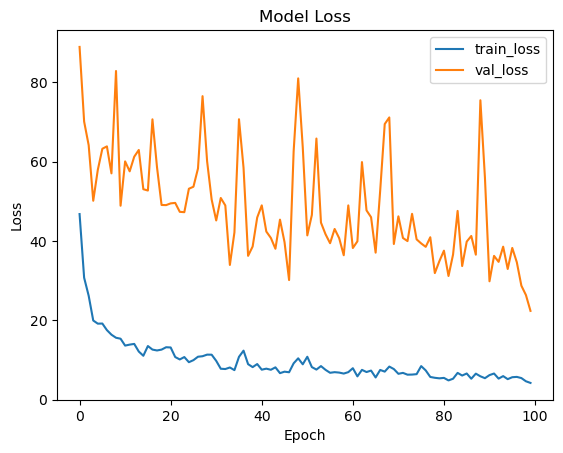

In [42]:
# Plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train_loss", "val_loss"], loc = 'upper right')
plt.show()